In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
# df = pd.read_csv(url, index_col="id")
df = pd.read_csv('telco_churn.csv')
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# do some data cleaning for TotalCharges column

# remove any leading or trailing whitespaces
# df['TotalCharges'] = df['TotalCharges'].str.strip()

# replace spaces with NaNs
df = df.replace(r'^\s*$', np.nan, regex=True)

# drop NaNs from data
df = df.dropna()

# convert from object to float
df.TotalCharges = df.TotalCharges.astype(float)

In [5]:
df.head(4).T


,0,1,2,3
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW
gender,Female,Male,Male,Male
SeniorCitizen,0,0,0,0
Partner,Yes,No,No,No
Dependents,No,No,No,No
tenure,1,34,2,45
PhoneService,No,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service
InternetService,DSL,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes,Yes


In [ ]:
# pd.set_option('display.max_columns', None)

## Exercise 1

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges?

What happens if you control for phone and internet service?

- $H_o$: tenure and monthly charges are not linearly correlated
- $H_a$: tenure and monthly charges are linearly correlated

then

- $H_o$: tenure and total charges are not linearly correlated
- $H_a$: tenure and total charges are linearly correlated

then

Control for Phone and Internet Service

In [6]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [7]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.24686176664089568, 3.9898213232510553e-98)

In [8]:
# 𝐻𝑜 : tenure and total charges are not linearly correlated
# 𝐻𝑎 : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(df.tenure, df.TotalCharges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.8258804609332093, 0.0)

In [9]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

### How to Control for Variables
- Perform your original analysis in a way that removes the variable we're trying to control out of the question.
- If we control for phone service, and test for linear correlation between `tenure` and `monthly_charges`, then we will create a `no_phone` and a `phone` group then check their `tenure` to `monthly_charges` correlation w/ the Pearson's test
- If we also control for internet connection, we'll need to produce each pairing of subsets

In [ ]:
df.columns

In [10]:
df['phone_type'] = np.where(df.PhoneService == 'No', 'No Phone Service', np.where(((df.PhoneService == 'Yes') & (df.MultipleLines == 'No')), 'One Line','Two or More Lines'))

In [11]:
# We'll run a correlation test for 
df.phone_type.value_counts()

One Line             3385
Two or More Lines    2967
No Phone Service      680
Name: phone_type, dtype: int64

In [12]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [13]:
df['InternetService'] = df.InternetService.replace('No', 'No Internet')

In [ ]:
df[df.phone_type == 'One Line']

In [14]:
# Let's combine all these different values together
df["telecom_setup"] = df.InternetService + " " + df.phone_type
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [15]:
df.telecom_setup.value_counts()

Fiber optic Two or More Lines    1938
No Internet One Line             1180
Fiber optic One Line             1158
DSL One Line                     1047
DSL Two or More Lines             689
DSL No Phone Service              680
No Internet Two or More Lines     340
Name: telecom_setup, dtype: int64

In [16]:
options = df.telecom_setup.value_counts().index
options

Index(['Fiber optic Two or More Lines', 'No Internet One Line',
       'Fiber optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Two or More Lines'],
      dtype='object')

In [17]:
options[1]

'No Internet One Line'

In [18]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure, subset.MonthlyCharges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Two or More Lines,0.573212,1.083568e-169,reject the null hypothesis that there is no li...
1,No Internet One Line,-0.012140,6.769684e-01,fail to reject the null hypothesis that there ...
2,Fiber optic One Line,0.528906,1.881036e-84,reject the null hypothesis that there is no li...
3,DSL One Line,0.562023,3.174262e-88,reject the null hypothesis that there is no li...
4,DSL Two or More Lines,0.609170,3.258127e-71,reject the null hypothesis that there is no li...
5,DSL No Phone Service,0.592430,1.173274e-65,reject the null hypothesis that there is no li...
6,No Internet Two or More Lines,-0.033216,5.416047e-01,fail to reject the null hypothesis that there ...


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

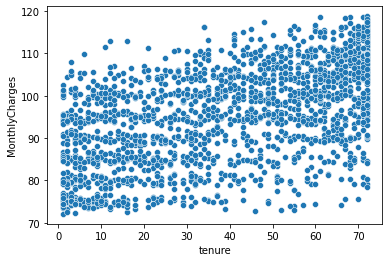

In [19]:
fiber_2_lines = df[df.telecom_setup == "Fiber optic Two or More Lines"]
sns.scatterplot(x="tenure", y="MonthlyCharges", data=fiber_2_lines)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

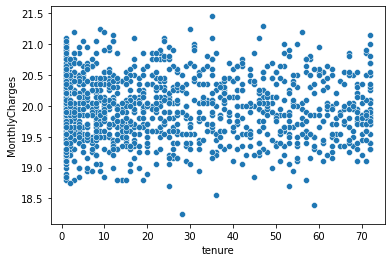

In [20]:
no_internet_one_line = df[df.telecom_setup == "No Internet One Line"]
sns.scatterplot(x="tenure", y="MonthlyCharges", data=no_internet_one_line)

In [21]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure, subset.TotalCharges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Two or More Lines,0.983112,0.0,reject the null hypothesis that there is no li...
1,No Internet One Line,0.996779,0.0,reject the null hypothesis that there is no li...
2,Fiber optic One Line,0.986829,0.0,reject the null hypothesis that there is no li...
3,DSL One Line,0.973611,0.0,reject the null hypothesis that there is no li...
4,DSL Two or More Lines,0.965781,0.0,reject the null hypothesis that there is no li...
5,DSL No Phone Service,0.953423,0.0,reject the null hypothesis that there is no li...
6,No Internet Two or More Lines,0.994139,0.0,reject the null hypothesis that there is no li...


## Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [22]:
from env import user, password, host
import pymysql

In [23]:
def get_db_url(user,password,host,database):
    '''get a url from input user, password, host and database'''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
conn = get_db_url(user, password, host, "employees")

In [24]:
sql = """
select emp_no, salary, datediff((select max(hire_date) from employees), hire_date) as tenure from employees
join salaries using(emp_no);
"""

In [25]:
df = pd.read_sql(sql, conn)
df.head(3)

,emp_no,salary,tenure
0,10001,60117,4964
1,10001,62102,4964
2,10001,66074,4964


<AxesSubplot:xlabel='tenure', ylabel='salary'>

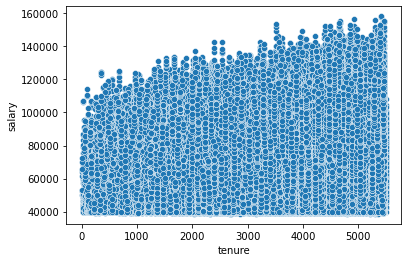

In [26]:
sns.scatterplot(x="tenure", y="salary", data=df)

## Is there a relationship between how long an employee has been with the company and their salary?

$H_o$: There is not a linear correlation between employee tenure and salary

$H_a$: There is a linear correlation between employee tenure and salary

In [27]:
alpha = 0.05
corr, p = stats.pearsonr(df.tenure, df.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.157629197069865, 0.0)

## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- $H_o$: There is no linear correlation between tenure and number of titles
- $H_a$: There is a linear correlation between tenure and number of titles

In [28]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

In [29]:
df = pd.read_sql(sql, conn)
df.head()

,emp_no,title_count,days_on_job
0,10001,1,13151
1,10002,1,13368
2,10003,1,13088
3,10004,2,12993
4,10005,2,11977


<AxesSubplot:xlabel='days_on_job', ylabel='title_count'>

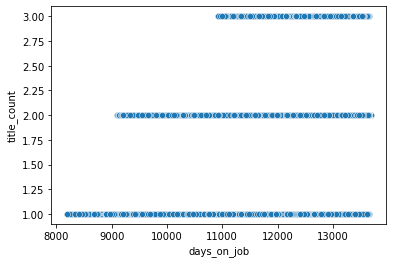

In [30]:
sns.scatterplot(x="days_on_job", y="title_count", data=df)

In [31]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.26659892991364276, 0.0)

Takeaway: It's possible to have a _super_ low p value, even zero p value, and still have a weak correlation. A super high number of observations can show significance through low p values

## Use the sleepstudy data. Is there a relationship between days and reaction time?


In [32]:
from pydataset import data
df = data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


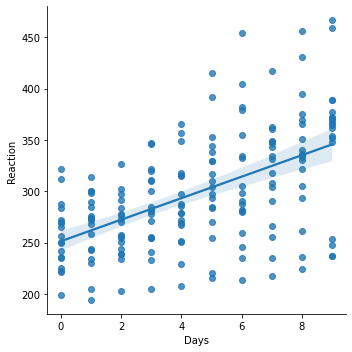

In [33]:
sns.lmplot(data=df, x = "Days", y = "Reaction")

$H_o$: There is no linear correlation between days and reaction time

$H_a$: There is a linear correlation between days and reaction time

In [34]:
corr, p = stats.pearsonr(df.Days, df.Reaction)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis


(0.5352302262650254, 9.89409632221453e-15)